# Assignment 3

## Digital Musicology

@authors: Joris Monnet, Xingyu Pan, Yutaka Osaki, Yiwei Liu

Due Date: 15/05/2024

### Task C1

In [9]:
import matplotlib.pyplot as plt

## Boundaries from timing/tempo differences

[0.950521, 5.6770830000000005, 16.03125, 23.844792, 27.385416999999997, 47.788021, 60.873957999999995, 65.015625, 72.33125, 83.169792, 93.9416665, 101.127083, 106.21354199999999, 110.329167, 115.68958300000001, 124.34166699999999, 147.785417, 167.866146, 176.775, 183.1067705, 192.80625, 202.70625, 217.883854, 226.707292, 233.0796875, 242.5166665, 267.06875, 289.5161455, 293.8875, 318.159375, 322.045442625, 333.589583, 340.769792]
[0.0, 2.0, 7.0, 10.0, 12.0, 22.0, 27.0, 29.0, 33.0, 37.0, 43.0, 46.0, 48.0, 50.0, 53.0, 57.0, 66.0, 74.0, 78.0, 81.0, 85.0, 89.0, 95.0, 99.0, 102.0, 106.0, 116.0, 124.0, 126.0, 138.0, 140.0, 145.0, 149.0]


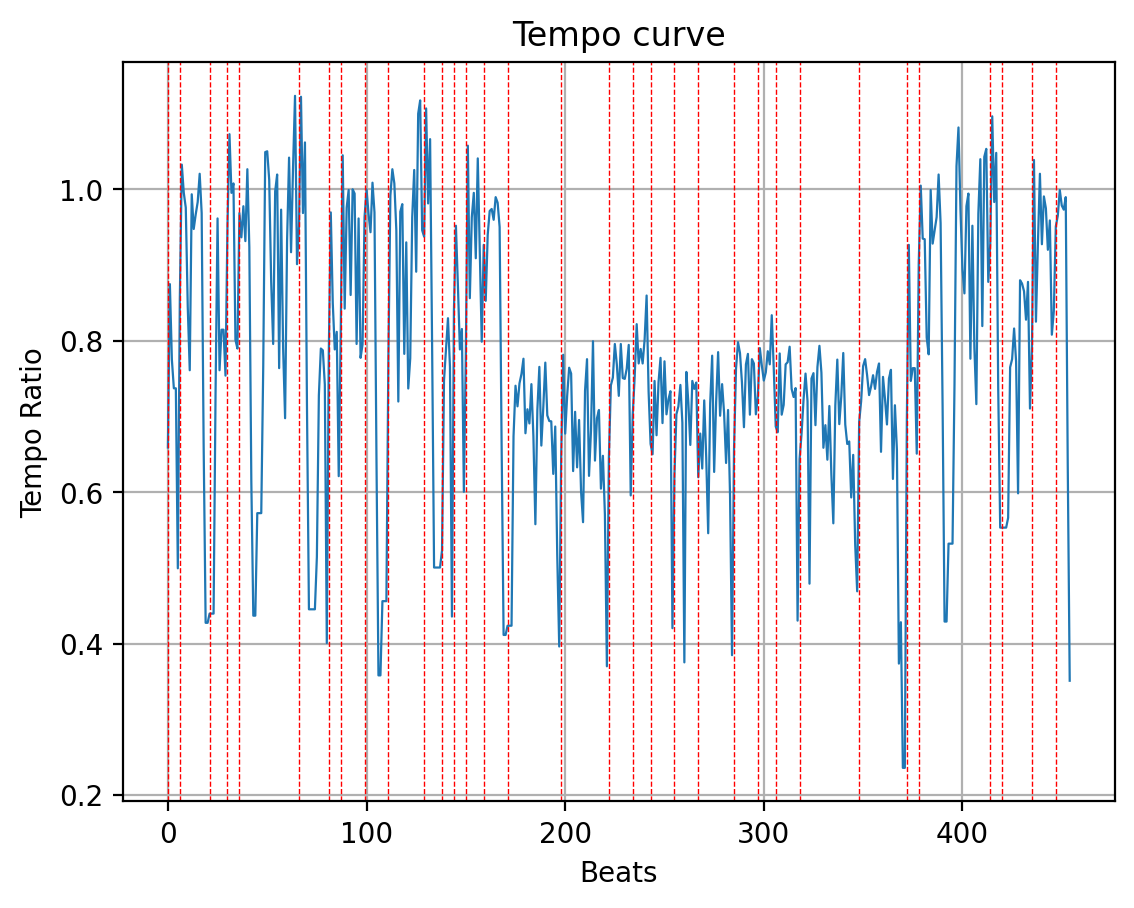

In [10]:
%reload_ext autoreload

from src.timing_plotter import plot_timing_for_one_piece
from src.timing_for_one_piece import get_average_timing_one_piece, get_tempo_map
from src.task_c1 import get_phrase_boundaries

boundaries, boundaries_times = get_phrase_boundaries('asap-dataset/Schubert/Moment_Musical_no_1')
print(boundaries_times)
measures = [boundaries[i] / 3 for i in range(len(boundaries))]
print(measures)
average = get_average_timing_one_piece('asap-dataset/Schubert/Moment_Musical_no_1')
plot_timing_for_one_piece(get_tempo_map(average), boundaries)

## Function to distinguish phrases based on volume using midi file


In [11]:
import music21

midi_file_path = 'asap-dataset/Schubert/Moment_Musical_no_1/MunA10M.mid'
midi_data = music21.converter.parse(midi_file_path)
tempo = midi_data.metronomeMarkBoundaries()[0][2].number

In [12]:
from src.task_c1 import get_times_volumes_measures, get_scaled_differences_in_volumes, get_times_threshold, \
    offset_to_seconds

list_time, list_volumes, list_measures = get_times_volumes_measures(midi_file_path)
list_volume_differences_scaled = get_scaled_differences_in_volumes(list_volumes)
times_above_threshold_ = get_times_threshold(list_time, list_volume_differences_scaled, 0.15)
times_above_threshold = [float(x) for x in times_above_threshold_]
filtered_data = []
threshold_closest = 2

filtered_data = [times_above_threshold[0]]
for i in range(1, len(times_above_threshold)):
    if times_above_threshold[i] - filtered_data[-1] > threshold_closest:
        filtered_data.append(times_above_threshold[i])

split_point = [offset_to_seconds(x, tempo) for x in filtered_data]
print(split_point)

[33.333333333333336, 41.75, 51.125, 63.833333333333336, 75.875, 87.875, 97.16666666666667, 102.625, 121.125, 142.20833333333334, 143.33333333333334, 158.75, 162.20833333333334, 192.91666666666666, 205.25, 206.95833333333334, 212.45833333333334, 234.75, 241.91666666666666, 253.58333333333334, 256.5833333333333, 260.4583333333333, 278.4583333333333, 282.125, 293.5833333333333, 304.0833333333333, 311.7083333333333, 312.7916666666667, 314.4583333333333, 331.9583333333333]


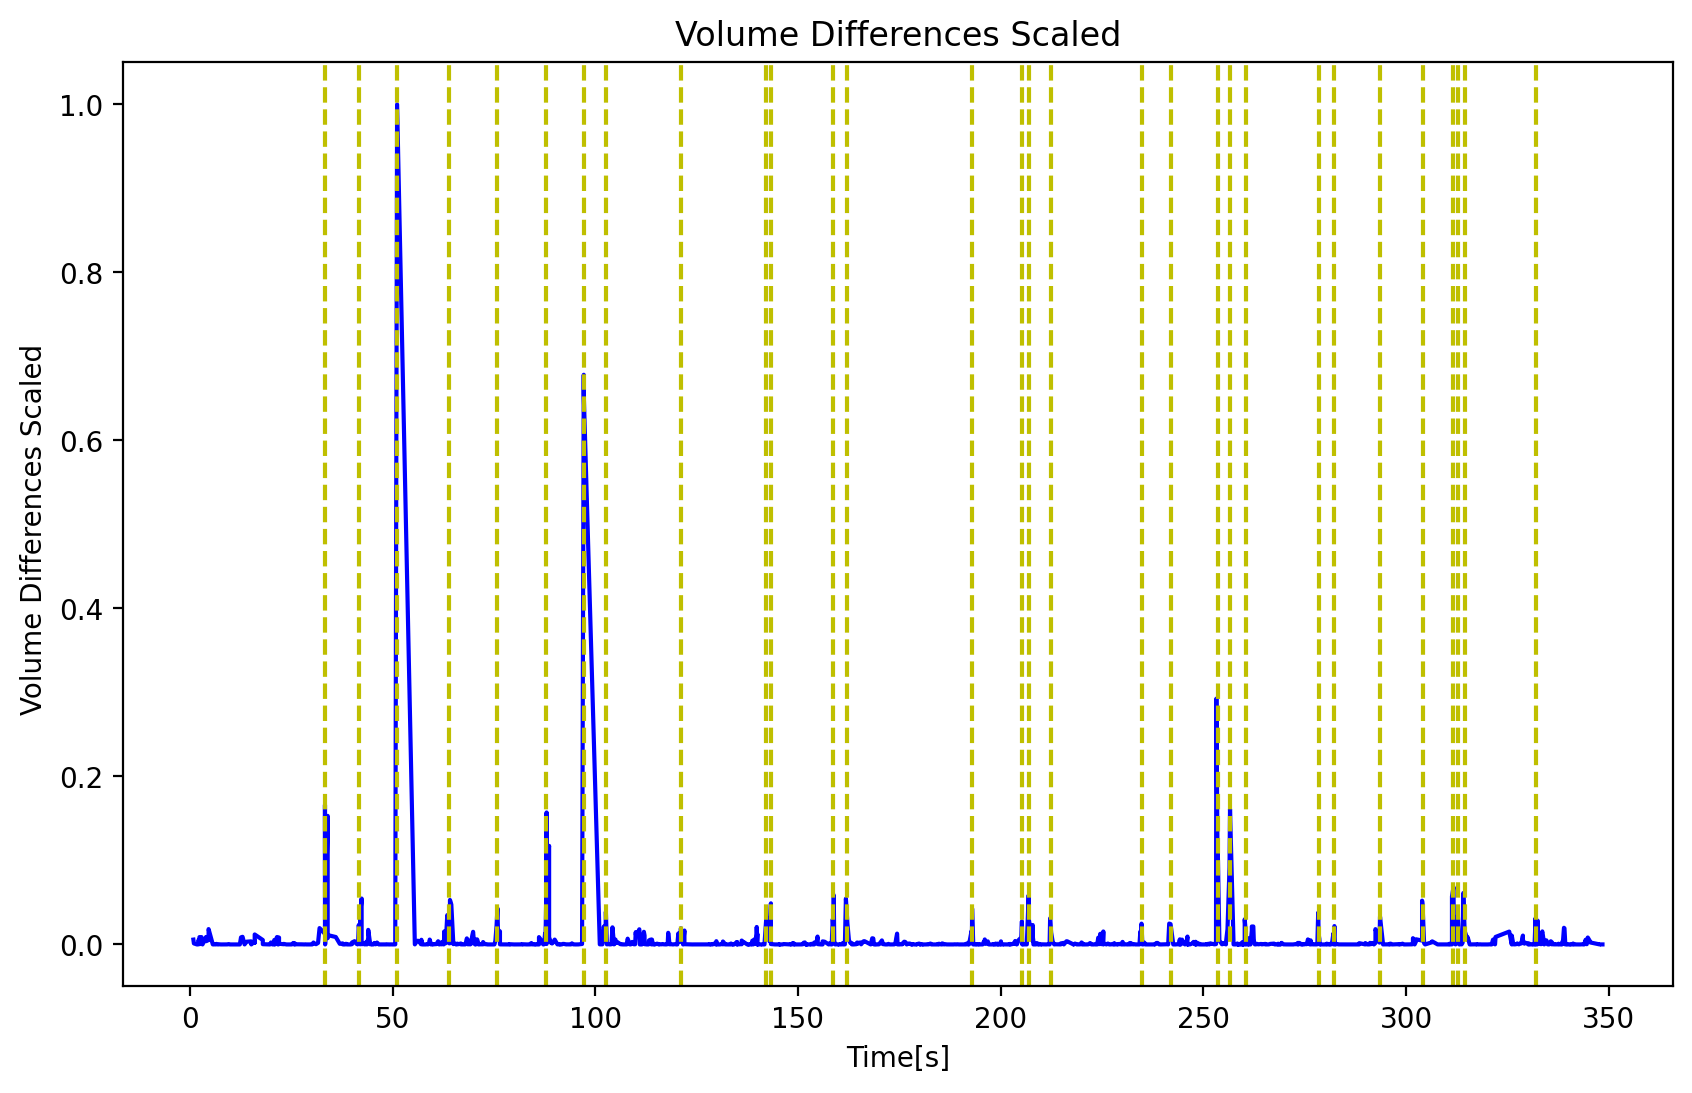

In [13]:
from src.task_c1 import plot_volume

plot_volume(list_volume_differences_scaled, filtered_data, list_time, tempo)

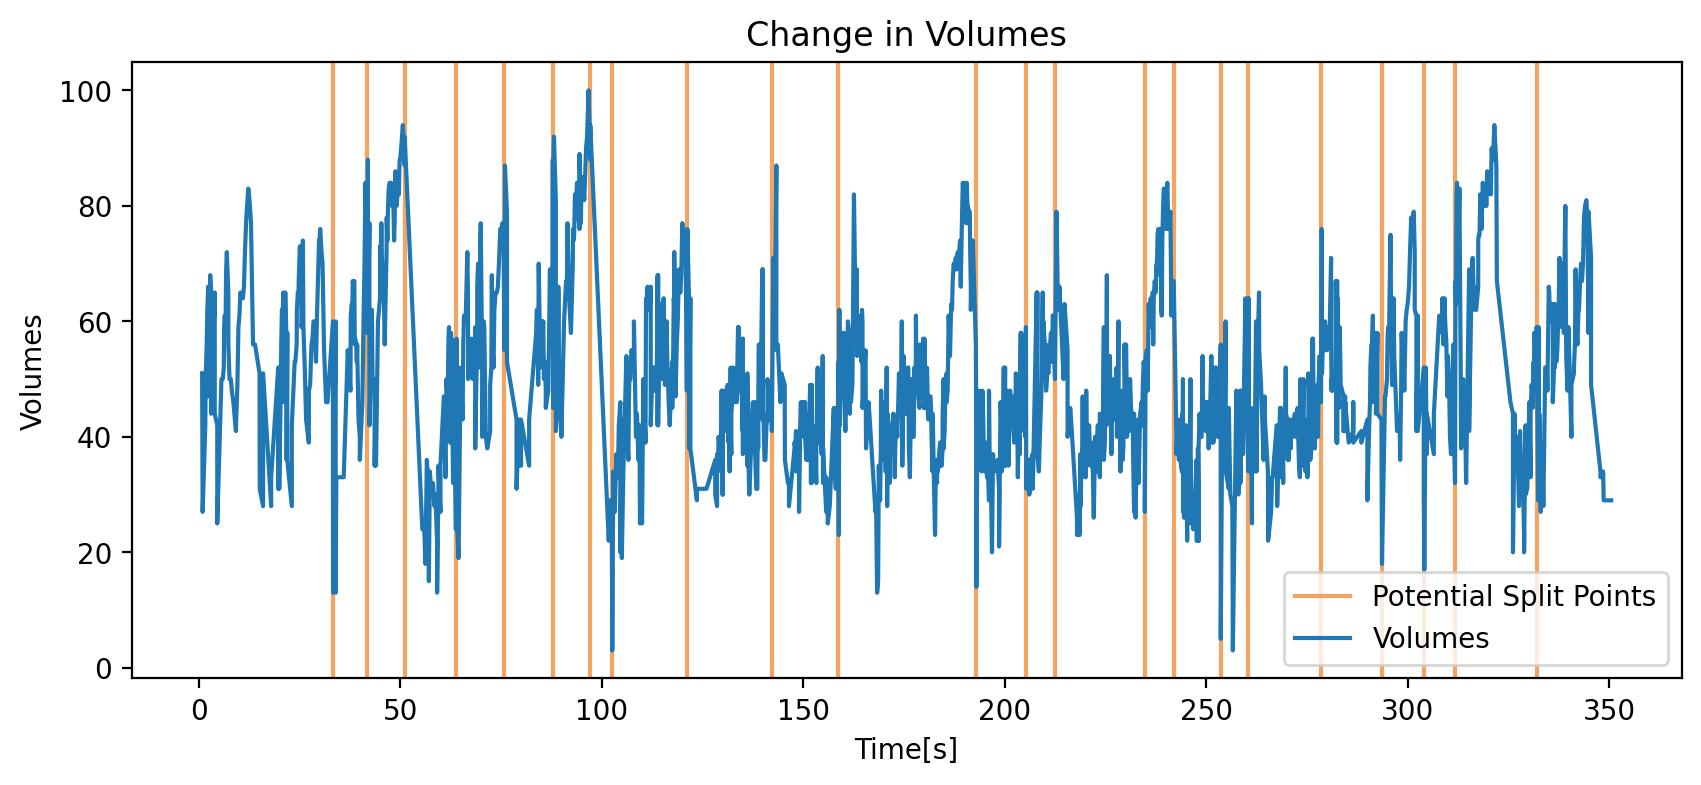

In [14]:
potential_split_point = [split_point[0]]
for point in split_point:
    for p in potential_split_point:
        if abs(p - point) < 5:
            break
    else:
        potential_split_point.append(point)

list_time_second = [offset_to_seconds(x, tempo) for x in list_time]
plt.figure(figsize=(10, 4))
plt.title("Change in Volumes")
plt.ylabel("Volumes")
plt.xlabel("Time[s]")
for x in potential_split_point:
    plt.axvline(x=x, color="sandybrown", linestyle="-", label="Potential Split Points")
plt.plot(list_time_second, list_volumes, label="Volumes")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

## Boundaries From performance attributes merged

In [15]:
result_boundaries = []
boundaries_to_times = {}
for i in range(len(boundaries)):
    boundaries_to_times[boundaries_times[i]] = boundaries[i]

threshold_similarity = 5
min_velocity = min(split_point) - threshold_similarity
max_velocity = max(split_point) + threshold_similarity

for point in split_point:
    for boundaries_time in boundaries_times:
        if abs(boundaries_time - point) < threshold_similarity and boundaries_time not in result_boundaries:
            result_boundaries.append(boundaries_time)
            break
        elif boundaries_time < min_velocity and boundaries_time not in result_boundaries:
            result_boundaries.append(boundaries_time)
            break
        elif boundaries_time > max_velocity and boundaries_time not in result_boundaries:
            result_boundaries.append(boundaries_time)
            break

print("TIMINGS: ")
print(result_boundaries)
print("-------------------")

# Get Measure from boundaries time
result_measures = []
for boundary in result_boundaries:
    b = boundaries_to_times[boundary]
    result_measures.append(b / 3)

realigned_measures = []

for measure in result_measures:
    if 7 < measure:
        measure -= 8
    if 28 < measure:
        measure -= 21
    if 36 < measure:
        measure -= 8
    if 57 < measure:
        measure -= 21
    realigned_measures.append(measure)

print("MEASURES: ")
print(realigned_measures)
print("-------------------")

realigned_measures.sort()
sizes = [realigned_measures[i + 1] - realigned_measures[i] for i in range(len(realigned_measures) - 1)]
sizes = [x for x in sizes if x > 0]
print("SIZE OF PHRASES: ")
print(sizes)
print("-------------------")

TIMINGS: 
[0.950521, 5.6770830000000005, 16.03125, 23.844792, 27.385416999999997, 83.169792, 93.9416665, 101.127083, 124.34166699999999, 340.769792, 147.785417, 192.80625, 202.70625, 233.0796875, 242.5166665, 289.5161455, 318.159375, 333.589583]
-------------------
MEASURES: 
[0.0, 2.0, 7.0, 2.0, 4.0, 8.0, 14.0, 17.0, 28.0, 91.0, 29.0, 48.0, 52.0, 44.0, 48.0, 66.0, 80.0, 87.0]
-------------------
SIZE OF PHRASES: 
[2.0, 2.0, 3.0, 1.0, 6.0, 3.0, 11.0, 1.0, 15.0, 4.0, 4.0, 14.0, 14.0, 7.0, 4.0]
-------------------


### Task C3

MIDI File: asap-dataset/Schubert/Moment_Musical_no_1/midi_score.mid
AVERAGE RATIO: 1.4640522875816993


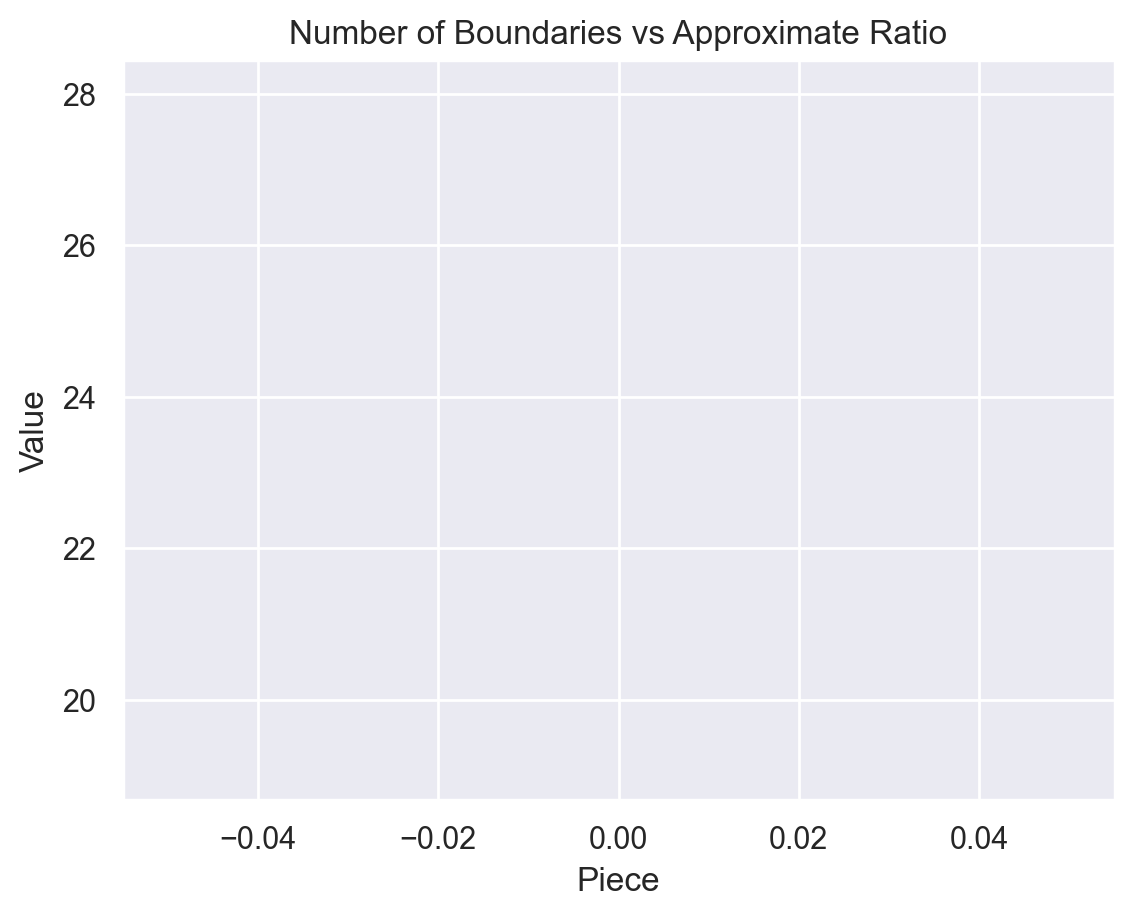

In [4]:
from src.task_c3 import run_on_whole_dataset, plot_results

results_schubert = run_on_whole_dataset("asap-dataset/Schubert/Moment_Musical_no_1")
plot_results(results_schubert)

In [5]:
print(results_schubert)

{'asap-dataset/Schubert/Moment_Musical_no_1/midi_score.mid': {'boundaries': [1, 15, 21, 30, 37, 59, 62, 64, 66, 72, 74, 76, 78, 82, 85, 87, 92, 108, 113, 116, 119, 121, 124, 128, 130, 137, 145, 149], 'nb_boundaries': 28, 'nb_measures': 153, 'approx_ratio': 19.125}}


### Task C4

In [5]:
from src.task_c4 import run_c1_whole_dataset

c1_results = run_c1_whole_dataset("asap-dataset")
print(c1_results)

Error for asap-dataset/Beethoven/Piano_Sonatas/17-3: 1454
Error for asap-dataset/Beethoven/Piano_Sonatas/26-3: 391
Error for asap-dataset/Schumann/Kreisleriana/2: 486
Error for asap-dataset/Schumann/Kreisleriana/5: 517
Error for asap-dataset/Scriabin/Sonatas/5: 979
{'Bach/Fugue/bwv_846': {'nb_phrases': 6, 'nb_measures': 26, 'approx_ratio': 3.25}, 'Bach/Fugue/bwv_848': {'nb_phrases': 14, 'nb_measures': 54, 'approx_ratio': 6.75}, 'Bach/Fugue/bwv_854': {'nb_phrases': 6, 'nb_measures': 28, 'approx_ratio': 3.5}, 'Bach/Fugue/bwv_856': {'nb_phrases': 11, 'nb_measures': 72, 'approx_ratio': 9.0}, 'Bach/Fugue/bwv_857': {'nb_phrases': 11, 'nb_measures': 57, 'approx_ratio': 7.125}, 'Bach/Fugue/bwv_858': {'nb_phrases': 10, 'nb_measures': 34, 'approx_ratio': 4.25}, 'Bach/Fugue/bwv_860': {'nb_phrases': 19, 'nb_measures': 86, 'approx_ratio': 10.75}, 'Bach/Fugue/bwv_862': {'nb_phrases': 11, 'nb_measures': 34, 'approx_ratio': 4.25}, 'Bach/Fugue/bwv_863': {'nb_phrases': 8, 'nb_measures': 40, 'approx_rati

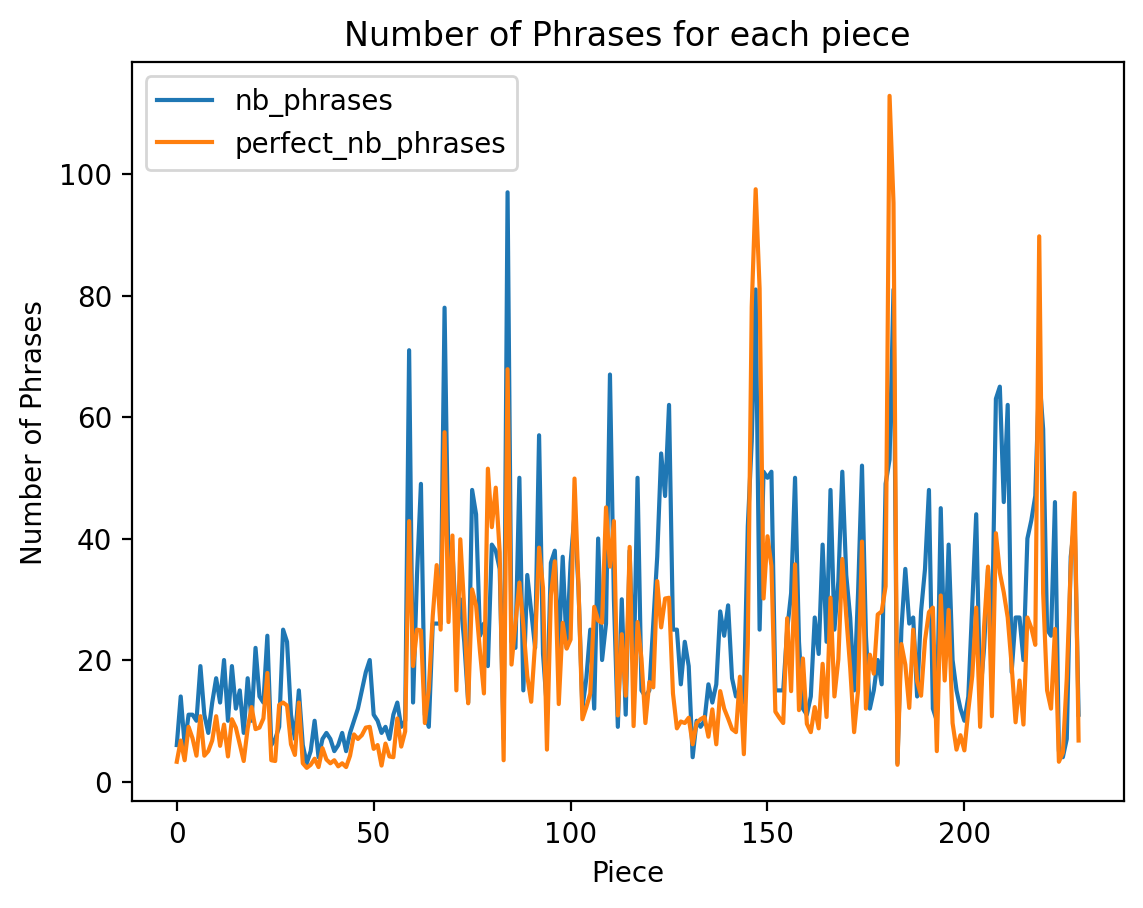

In [23]:
# Plot the results

import matplotlib.pyplot as plt

x = [x for x in range(len(c1_results))]
filtered = {x: c1_results[x] for x in c1_results if c1_results[x] != 'Error'}
x = [x for x in range(len(filtered))]
y = [filtered[x]['nb_phrases'] for x in filtered]
y2 = [filtered[x]['approx_ratio'] for x in filtered]
plt.plot(x, y, label='nb_phrases')
plt.plot(x, y2, label='perfect_nb_phrases')
plt.xlabel('Piece')
plt.ylabel('Number of Phrases')
plt.title('Number of Phrases for each piece')
plt.legend()
plt.show()

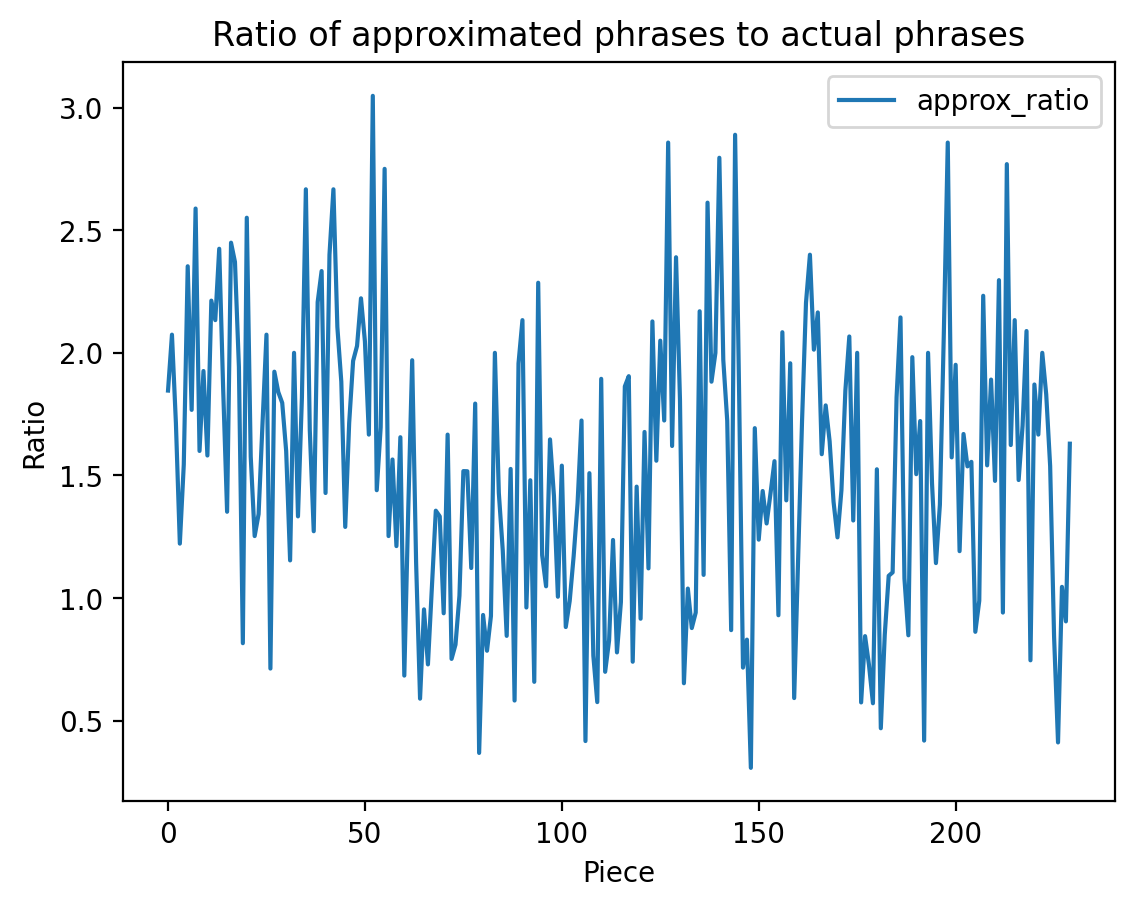

In [25]:
# Plot the results as a ratio

x = [x for x in range(len(c1_results))]
filtered = {x: c1_results[x] for x in c1_results if c1_results[x] != 'Error'}
x = [x for x in range(len(filtered))]
y = [filtered[x]['nb_phrases'] / filtered[x]['approx_ratio'] for x in filtered]
plt.plot(x, y, label='approx_ratio')
plt.xlabel('Piece')
plt.ylabel('Ratio')
plt.title('Ratio of approximated phrases to actual phrases')
plt.legend()
plt.show()

In [26]:
average = sum(y) /len(y)
print("AVERAGE: ", average)

AVERAGE:  1.5285075675489304


## Task C4 - Part 2

MIDI File: asap-dataset/Bach/Fugue/bwv_846/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_848/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_854/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_856/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_857/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_858/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_860/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_862/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_863/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_864/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_865/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_866/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_867/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_868/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_870/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_873/midi_score.mid
MIDI File: asap-dataset/Bach/Fugue/bwv_874/midi_score.mid
MIDI File: asa

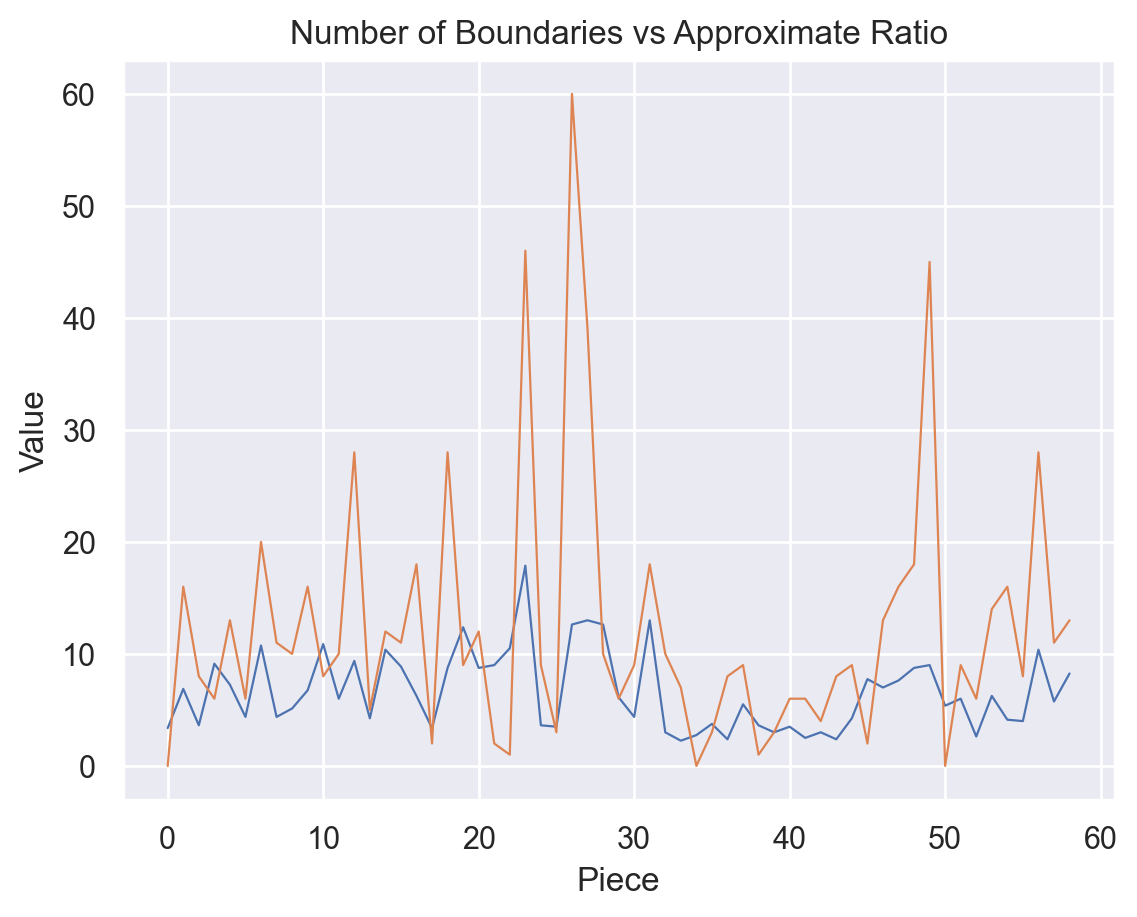

In [2]:
from src.task_c3 import run_on_whole_dataset, plot_results

results = run_on_whole_dataset("asap-dataset/Bach/")
plot_results(results)

## Task C4 - Part 3

In [8]:
from src.task_c4 import run_c1_whole_dataset
piece_path = "asap-dataset/Bach/Fugue/bwv_848"

c1_results = run_c1_whole_dataset(piece_path)
print(c1_results)

{'Bach/Fugue/bwv_848': {'nb_phrases': 14, 'nb_measures': 54, 'approx_ratio': 6.75}}


In [9]:
from src.task_c3 import run_on_whole_dataset  

results = run_on_whole_dataset(piece_path)
print(results)

MIDI File: asap-dataset/Bach/Fugue/bwv_848/midi_score.mid
AVERAGE RATIO: 2.327272727272727
{'asap-dataset/Bach/Fugue/bwv_848/midi_score.mid': {'boundaries': [4, 6, 8, 12, 14, 17, 24, 26, 30, 34, 36, 43, 46, 49, 51, 53], 'nb_boundaries': 16, 'nb_measures': 55, 'approx_ratio': 6.875}}
